### TASK1: Import panda libary


In [106]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

### Task2: Collate monthly sales


In [10]:
files=[file for file in os.listdir('./Sales_Data')]
allMonthsData= pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/"+ file)
    allMonthsData=pd.concat([allMonthsData,df])
allMonthsData.to_csv("collated_data.csv", index=False)    
    

In [12]:
collated_data=pd.read_csv("collated_data.csv")
collated_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Task3: Cleaning the data

#### Drop NAN rows and Remove Or

In [61]:
nan_df=collated_data[collated_data.isna().any(axis=1)]
nan_df.head()

collated_data=collated_data.dropna(how='all')
collated_data.head(5)

collated_data=collated_data[collated_data['Order Date'].str[0:2]!='Or']
collated_data.head(20)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,11.95
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101",4,99.99
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",4,11.95
9,176565,Macbook Pro Laptop,1,1700.00,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",4,1700.00
10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215",4,11.99


### Add Months column



In [39]:
collated_data['Month']=collated_data['Order Date'].str[0:2]

collated_data['Month']=collated_data['Month'].astype('int32')
#collated_data['Month']=pd.to_numeric(collated_data['Order Date'])#converted to int

# To find the Best sales month and amount


In [69]:
collated_data['Quantity Ordered']=pd.to_numeric(collated_data['Quantity Ordered'])#make as int
collated_data['Price Each']=pd.to_numeric(collated_data['Price Each'])#make as float

collated_data['Sales']=collated_data['Quantity Ordered']*collated_data['Price Each']#sales per day in a month
#collated_data.head(25)
results=collated_data.groupby('Month').sum()
results



,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


### Plot montly sales using plotlib

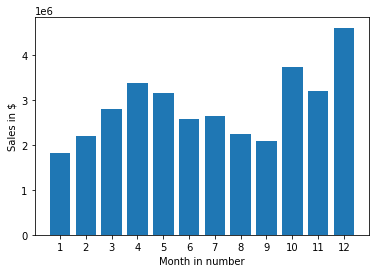

In [62]:
months=range(1,13)
plt.bar(months,results['Sales'])

plt.xticks(months)
plt.ylabel('Sales in $')
plt.xlabel('Month in number')
plt.show()

# To find the city with the maximum sales

### Add City column and state to remove duplicacy

In [66]:
def get_city(address):
    return address.split(',')[1]
def get_state(address):
    return address.split(',')[2].split(' ')[1]


collated_data['City']=collated_data['Purchase Address'].apply(lambda x:f"{get_city(x)},({get_state(x)})")
collated_data.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas,(TX)"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston,(MA)"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles,(CA)"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles,(CA)"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles,(CA)"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,11.95,"San Francisco,(CA)"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101",4,99.99,"Seattle,(WA)"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",4,11.95,"Atlanta,(GA)"
9,176565,Macbook Pro Laptop,1,1700.00,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",4,1700.00,"San Francisco,(CA)"
10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215",4,11.99,"Boston,(MA)"


#### To find city with highest number of sales and plot

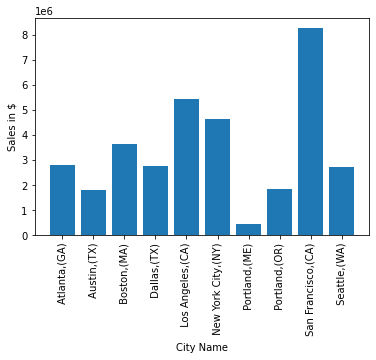

In [76]:
results=collated_data.groupby('City').sum()
results
#plotting the graph

cities=[city for city, df in collated_data.groupby('City')]

plt.bar(cities,results['Sales'])
plt.xticks(cities, rotation='vertical', size=10)
plt.ylabel('Sales in $')
plt.xlabel('City Name')
plt.show()

### Best time of the day to advertise


#### Seperating the hour of the day from the order time and date and putting a count

In [81]:
collated_data['Order Date']=pd.to_datetime(collated_data['Order Date'])
collated_data['Hour']=collated_data['Order Date'].dt.hour
collated_data['CountHour']=1
collated_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,CountHour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas,(TX)",8,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston,(MA)",22,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles,(CA)",14,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles,(CA)",14,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles,(CA)",9,1


#### Plotting a graph to find the peak hours

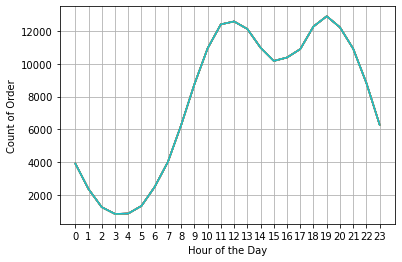

In [91]:
#Plotting graph to find the best time of the day for advertisement

hours=[hour for hour, df in collated_data.groupby('Hour')]

plt.plot(hours, collated_data.groupby(['Hour']).count())
plt.grid()
plt.xticks(hours)
plt.ylabel('Count of Order')
plt.xlabel('Hour of the Day')
plt.show()

#Peak at 11am and 7pm

# To find the products sold together most often

In [103]:
#find the duplicate order Id to know which orders were made together

df=collated_data[collated_data['Order ID'].duplicated(keep=False)]
#df.head(50)
df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df=df[['Order ID','Grouped']].drop_duplicates()
df.head(20)

<ipython-input-103-72413b36ee3c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,"Apple Airpods Headphones,ThinkPad Laptop"
138,176689,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
189,176739,"34in Ultrawide Monitor,Google Phone"
225,176774,"Lightning Charging Cable,USB-C Charging Cable"
233,176781,"iPhone,Lightning Charging Cable"


In [107]:
#counting the total number of products ordered together

count=Counter()

for row in df['Grouped']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


# What product sold the most and why?

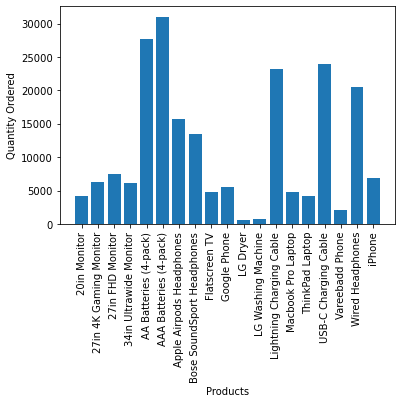

In [121]:
product_group=collated_data.groupby('Product')
quantity_ordered=product_group.sum()['Quantity Ordered']


#plotting the graph
products=[product for product, df in product_group]
plt.bar(products, quantity_ordered)
plt.xticks(products, rotation='vertical', size=10)
plt.ylabel('Quantity Ordered')
plt.xlabel('Products')
plt.show()

# Overlaying the graphs to get better insights

In [123]:
#mean of prices of each product sold

prices=collated_data.groupby('Product').mean()['Price Each']
print (prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


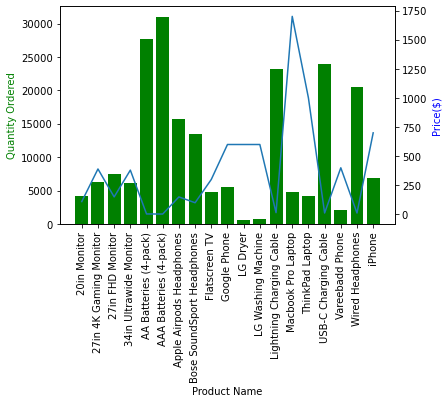

In [138]:
#graph to plot pricevs product vs quantity ordered

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products,prices,)

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price($)', color='b')
ax1.set_xticklabels(products,rotation='vertical',size=10)
plt.show()